# Simulation und Modellierung WS17/18 - Uebung 06

### Aufgabe 1: Erzeugung und Multiplikation von Vektoren und Matrizen

Die Ableitung einer Funktion $f(x)$ an einer Stelle $x_0$ kann mit Hilfe eines geeigneten Differenzenquotienten approximiert werden. Es gilt

$$
    \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h} = f'(x_0)
$$

- Definieren Sie eine `N`x`N` Matrix `D`, welche auf einen `N`x`1` Vektor `f` angewendet die symmetrische Differenz der Gitterpunkte $(Df)_i = f_{i+1}-f_{i-1}$ berechnet, wobei man periodische Randbedingungen $f_{i+N}=f_i$ annimmt. 
- berechnen Sie mit Hilfe dieser Matrix die erste und zweite Abbleitung der Funktion `f(x) = sin(x)` welche an `N` Gitterpunkten auf dem Intervall $[0,2\pi)$ gegeben sei.
- plotten Sie $f(x)$, $f'(x)$ und $f''(x)$ in ein Diagramm.

In [59]:
#Ausgabe der Plots im Notebook und laden von numpy und pylab (matplotlib+pyplot)
%matplotlib inline
import numpy as np 
from pylab import *

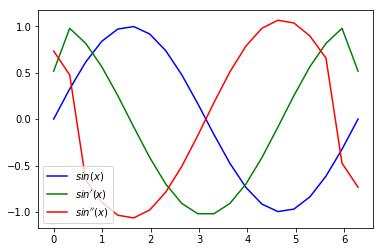

In [67]:
#define N, xrange, h, D, f
N=20 ############### N = 200 oder 2000 damit der Plot glatt ist / Funktionen wird an mehr Stelle evaluiert
x=linspace(0,2*np.pi, N)
############# np.linspace(0,2*np.pi,N, endpoint = False, sonst kriegt man falsche Randbedingung)
h= (2*np.pi) / N
D=np.eye(N,k=+1) - np.eye(N,k=-1)
D[0,N-1]=-1
D[N-1,0]=1
f=np.ones((N,1))

#set vector values to sin values
for i in range(len(x)):
    f[i] = np.sin(x[i]) 

#calculate first two derivations
df= D.dot(f) / (2*h)
d2f = D.dot(df) / (2 * h)

plot(x,f,'b',label='$sin(x)$')
plot(x,df,'g',label='$sin\'(x)$')
plot(x,d2f,'r',label="$sin''(x)$")
legend()
show()

In [ ]:
#define N, D, x, h, f, df  and d2f here

plot(x,f,'b',label='$sin(x)$')
plot(x,df,'g',label='$sin\'(x)$')
plot(x,d2f,'r',label="$sin''(x)$")
legend()
show()

### Aufgabe 2 : Der getriebene, gedaempfte harm. Oszillator

Der getriebene, gedaempfte harmonische Oszillator genuegt der Differentialgleichung

$$
    \ddot x + 2\gamma \dot x + \omega_0^2 x = A \cos(t)
$$
z.B. mit $\gamma=0.1$, $\omega_0=1.0$ und $A=1.0$.
- Schreiben Sie eine Funktion `limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100)`, welche die lineare, inhomogene Differentialgleichung in `N` Zeitschritte ueber eine Periode der antreibenen Kraft diskretisiert und als lineares Gleichungssystem 
<br><br>
$$
    \frac{1}{4h^2}\textrm{D}^2\cdot \vec{x} + 2\gamma \frac{1}{2h}\textrm{D}\cdot \vec{x} + \omega_0^2 ~\mathbf{1}\cdot \vec{x} = A cos(\vec{t})
$$
loest. 

- Bestimmen und zeichnen Sie die Amplitude $B$ und die Phasenverschiebung $\varphi$ der Loesung $x = B \cos(t-\varphi)$ als Funktion von $\omega_0$. Hierfuer kann man die numpy Array Methode `x.argmax()` verwenden, welche den Index des maximalen Elements von `x` liefert.
- Zeichnen Sie die analytischen Loesungen
$$
\begin{eqnarray}
    B &=& \frac{A}{\sqrt{(\omega_0^2-1)^2+4\gamma^2}} \\
    \tan\varphi &=& \frac{-2\gamma}{\omega_0^2-1}
\end{eqnarray}
$$
ueber die von Ihnen numerisch gefundenen Loesungen als Funktion der Eigenfrequenz $\omega_0$ des harmonischen Oscillators. *Hinweis :* Die Methode `numpy.arctan2(y,x)` gibt den Winkel `alpha` mit `sin(alpha)=y` und `cos(alpha)=x` zurueck.

In [ ]:
import numpy as np
def limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100) :
    """ 
    Bestimmt die Loesung der inhomogenen linearen Differentialgleichung
    d^2x/dt^2 + 2 gamma dx/dt + omega0^2 x = A cos(t)
    auf dem in N Punkte diskretisierten periodischen Zeitintervall [0,2pi)
    """
    
    #your code goes here

In [ ]:
L=100
omega0 = np.linspace(0.1,4,L)
B = np.zeros(L)
phi = np.zeros(L)

# bestimme B und phi numerisch fuer alle Werte in omega0
# definiere die theoretischen Werte Bth und phith


subplot(2,1,1)
plot(omega0,B,label='num.')
plot(omega0,Bth,'k--',label='Theorie')
legend()
xlabel('$\omega_0$')
ylabel('$B$')


subplot(2,1,2)
plot(omega0,phi,label='num.')
plot(omega0,phith,'k--',label='Theorie')
legend()
xlabel('$\omega_0$')
ylabel('$\phi$')
show()